['Sewickley Heights', 'Beechview (Pittsburgh)', 'Marshall', 'Mckees rocks', 'Duquesne Heights (Pittsburgh)', 'Ohio', 'Wilkins', 'Point Breeze (Pittsburgh)', 'West Deer', 'Forest Hills']
16 , 2768
['Sewickley Heights', 'Sewickley Heights']


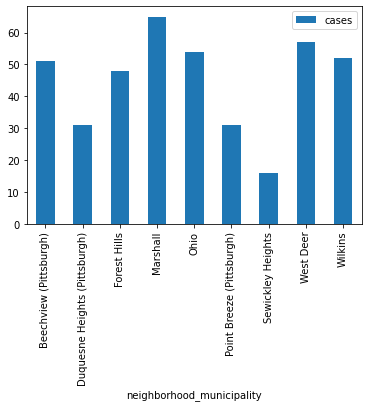

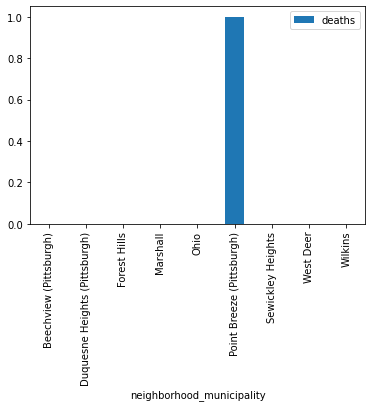

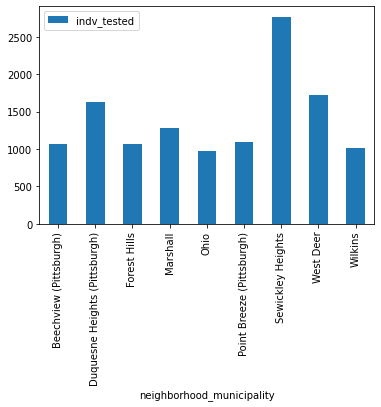

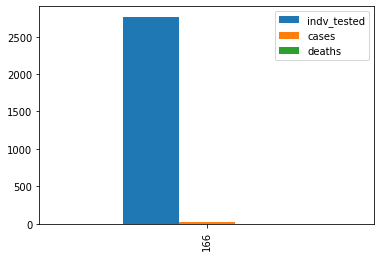

In [2]:
import pandas as pd
import numpy as np

pb_covid19_info = pd.read_csv("pittsburgh-covid19-cases.csv")

i = 0
mean_cases = pb_covid19_info['cases'].mean()
mean_deaths = pb_covid19_info['deaths'].mean()
mean_tests = pb_covid19_info['indv_tested'].mean()
best_neighborhoods_cases = []
best_neighborhoods_deaths = []
best_neighborhoods_tests = []
count = 0
deaths = 0

while i < len(pb_covid19_info):
    #loops through the csv file and adds the best neighborhoods to a list
    if pb_covid19_info['cases'].iloc[i] < mean_cases:
        best_neighborhoods_cases.append(pb_covid19_info['neighborhood_municipality'].iloc[i])
    if pb_covid19_info['deaths'].iloc[i] < mean_deaths:
        best_neighborhoods_deaths.append(pb_covid19_info['neighborhood_municipality'].iloc[i])
    if pb_covid19_info['indv_tested'].iloc[i] > mean_tests:
        best_neighborhoods_tests.append(pb_covid19_info['neighborhood_municipality'].iloc[i])
    i += 1

cases_set = set(best_neighborhoods_cases)
common_elements_set = cases_set.intersection(best_neighborhoods_deaths)
common_elements = list(common_elements_set)
best_neighborhoods_common = common_elements_set.intersection(best_neighborhoods_tests)
best_neighborhoods = list(best_neighborhoods_common)

print(best_neighborhoods)

#removes all rows that aren't one of the best neighborhoods
pb_covid19_info = pb_covid19_info.drop(pb_covid19_info
                      [(pb_covid19_info['neighborhood_municipality'] != 'Ohio') &
                       (pb_covid19_info['neighborhood_municipality'] != 'Wilkins') &
                       (pb_covid19_info['neighborhood_municipality'] != 'Point Breeze (Pittsburgh)') &
                       (pb_covid19_info['neighborhood_municipality'] != 'Marshall') &
                       (pb_covid19_info['neighborhood_municipality'] != 'Sewickley Heights') &
                       (pb_covid19_info['neighborhood_municipality'] != 'Beechview (Pittsburgh)') & 
                       (pb_covid19_info['neighborhood_municipality'] != 'West Deer') &
                       (pb_covid19_info['neighborhood_municipality'] != 'Forest Hills') & 
                       (pb_covid19_info['neighborhood_municipality'] != 'Duquesne Heights (Pittsburgh)') &
                       (pb_covid19_info['neighborhood_municipality'] != 'Mckees rock')].index)

pb_covid19_info.plot.bar(x = 'neighborhood_municipality', y = 'cases')

pb_covid19_info.plot.bar(x = 'neighborhood_municipality', y = 'deaths')

pb_covid19_info.plot.bar(x = 'neighborhood_municipality', y = 'indv_tested')

k = 0
fewest_cases = pb_covid19_info['cases'].iloc[0]
most_tested = pb_covid19_info['indv_tested'].iloc[0]
while k < len(pb_covid19_info):
    #loops through the csv file and adds the best(est) neighborhoods to a list
    if pb_covid19_info['cases'].iloc[k] < fewest_cases:
        fewest_cases = pb_covid19_info['cases'].iloc[k]
    if pb_covid19_info['indv_tested'].iloc[k] > most_tested:
        most_tested = pb_covid19_info['indv_tested'].iloc[k]
    k += 1

print(fewest_cases, ',', most_tested)

bestest_neighborhoods = []
j = 0
while j < len(pb_covid19_info):
    if pb_covid19_info['cases'].iloc[j] == fewest_cases:
        bestest_neighborhoods.append(pb_covid19_info['neighborhood_municipality'].iloc[j])
    if pb_covid19_info['indv_tested'].iloc[j] == most_tested:
        bestest_neighborhoods.append(pb_covid19_info['neighborhood_municipality'].iloc[j])
    j += 1

print(bestest_neighborhoods)

pb_covid19_info = pb_covid19_info.drop(pb_covid19_info[pb_covid19_info['neighborhood_municipality'] 
                                                               != 'Sewickley Heights'].index)

pb_covid19_info.plot.bar()

Best neighborhood: Sewickley Heights

With the dataset of coronavirus information of the Pittsburgh area's neighborhoods, I used pandas to discover which neighborhood was the best which, in my case, means has handled coronavirus the best. This is measured by the amount of tests, cases, and deaths in each neighborhood. I used pandas to search through the dataset and add only the neighborhoods who had above the mean number of tests and below the mean number of cases and deaths to a list of the best neighborhoods. From there, I searched through that list again using the same metric as before, and found the neighborhood Sewickley Heights to be the best, for overall fewest amounts of cases, 0 deaths, and most amount of tests.

In [3]:
pb_parks = pd.read_csv("ParkEquipmentPB.csv")

pb_parks = pb_parks.drop_duplicates(subset='name', keep="first")

neigh_names = pb_parks["neighborhood"].value_counts().index.tolist()
neigh_count = pb_parks["neighborhood"].value_counts()

best_neigh = neigh_names[:5]
best_neigh_count = neigh_count.head()

print("A list of the top 5 neighborhoods based on playground count is as follows: ")
print(best_neigh)
print(best_neigh_count)

park_names = pb_parks["name"].value_counts().index.tolist()
park_count = pb_parks["name"].value_counts()

best_park = park_names [:5]
best_park_count = park_count.head()

print("A list of the top 5 playgrounds based on number of equipment value is as follows: ")
print(best_park)
print(best_park_count)

FileNotFoundError: [Errno 2] File ParkEquipmentPB.csv does not exist: 'ParkEquipmentPB.csv'


With the dataset of playground equipment information in the different Pittsburgh neighborhoods, pandas was used to discover which neighborhood was the best based off of which neighborhood has the most playgrounds. This is measured by counting each neighborhood and assigning it to it's responding neighborhood. With pandas, the dataset was searched through and ordered based off of two things into two separate lists. The first list is of the top 5 neighborhoods based on playground count while the second list is of the top 5 individual playgrounds based on the amount of playground equipment.